# Loan Application Status Prediction

 ### Project Description

  This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history , 
  loan  amount, their income, dependents etc. 
 #### Independent Variables:
1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant's use under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [53]:
df = pd.read_csv(r"C:\Users\chaud\Downloads\loan_prediction.csv")
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
df.columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [55]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [56]:
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 613 rows and 13 columns respectively present in the dataset.


In [57]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

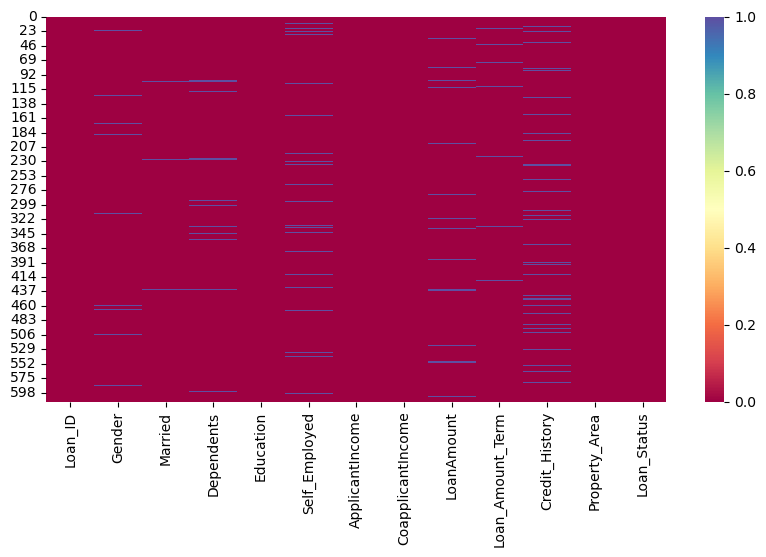

In [58]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cmap="Spectral")
plt.show()

Upon examining the dataset, the following observations can be made regarding missing values in each column:

- Gender: 13 missing values.
- Married: 3 missing values.
- Dependents: 15 missing values.
- Self_Employed: 32 missing values.
- LoanAmount: 22 missing values.
- Loan_Amount_Term: 14 missing values.
- Credit_History: 50 missing values.


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [60]:
df.nunique()


Loan_ID              613
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Removing NULL values from dataset

In [61]:
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace= True)
df['Married'].fillna(value=df['Married'].mode()[0], inplace= True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0], inplace= True)

In [72]:
df['Dependents'].fillna(value=df['Dependents'].mode()[0], inplace= True)


In [73]:
df['LoanAmount'].fillna(value=df['LoanAmount'].mean(), inplace= True)


In [74]:
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].mode()[0], inplace= True)


In [65]:
df['Credit_History'].fillna(value=df['Credit_History'].mode()[0], inplace= True)

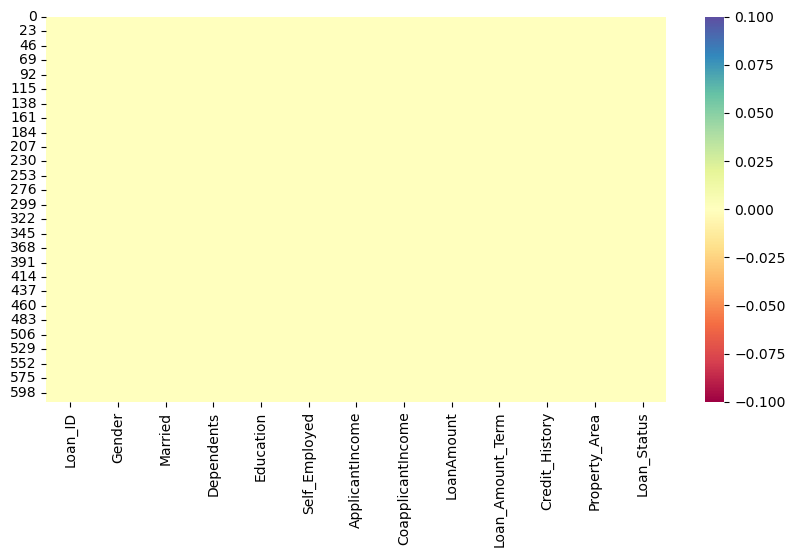

In [66]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cmap="Spectral")
plt.show()

## Dropping Irrelevant columns


In [67]:
df.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [68]:
df.shape

(613, 12)

In [69]:
# Convert selected float columns to integers
int_columns = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for column in int_columns:
    df[column] = df[column].astype(int)

# Verify the changes
print(df.dtypes)

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object


In [70]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.889070,146.398042,342.381729,0.854812
std,6114.004114,2927.903976,84.106131,64.477319,0.352578
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Upon analyzing the summary statistics of the dataset using the describe() function, we can make the following important observations:

ApplicantIncome: The average applicant income is approximately 5403, with a wide range of incomes from 150 to 81000. The data is characterized by relatively high variability, as indicated by the standard deviation of 6109.

CoapplicantIncome: The average coapplicant income is approximately 1621, with values ranging from 0 to 41667. Similar to applicant income, this column also exhibits significant variability (standard deviation of 2926).

LoanAmount: The average loan amount applied for is approximately 146, with values ranging from 9 to 700. The standard deviation is approximately 84, indicating variability in loan amounts.

Loan_Amount_Term: The majority of loan applicants (75%) have a loan amount term of 360 months (30 years), with some variability around this value. The range of terms is from 12 months to 480 months.

Credit_History: The majority of applicants (approximately 86%) have a credit history of 1 (good credit), while around 14% have a credit history of 0 (poor credit or no credit history).

These summary statistics provide insights into the central tendency, spread, and distribution of numerical variables in the dataset. The wide ranges and variabilities in applicant income, coapplicant income, and loan amount suggest diversity in the financial profiles of loan applicants. Additionally, the high percentage of applicants with good credit history is noteworthy and may play a significant role in loan approval decisions.

In [75]:
skewness = df.skew()
skewness

ApplicantIncome      6.534654
CoapplicantIncome    7.488651
LoanAmount           2.724893
Loan_Amount_Term    -2.399297
Credit_History      -2.019265
dtype: float64

### Visualization

In [76]:
df['Gender'].value_counts()


Male      501
Female    112
Name: Gender, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='count'>

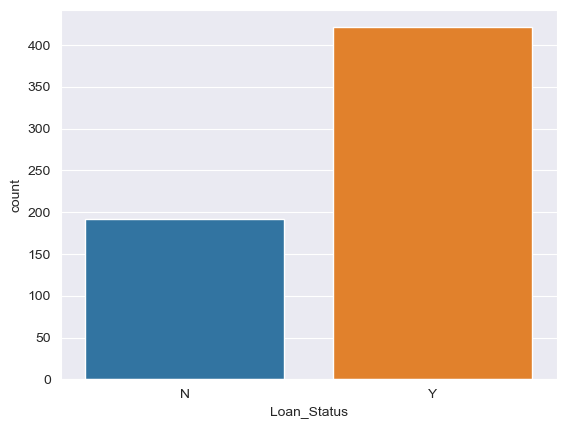

In [93]:
sns.set_style('darkgrid')
sns.countplot(x='Loan_Status', data=df)

<Axes: xlabel='Gender', ylabel='count'>

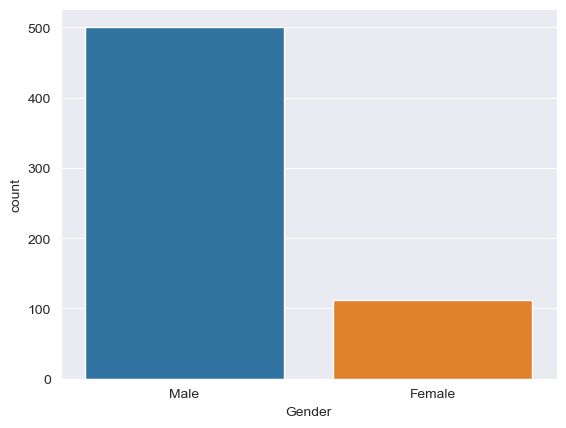

In [77]:
sns.set_style('darkgrid')
sns.countplot(x='Gender', data=df)

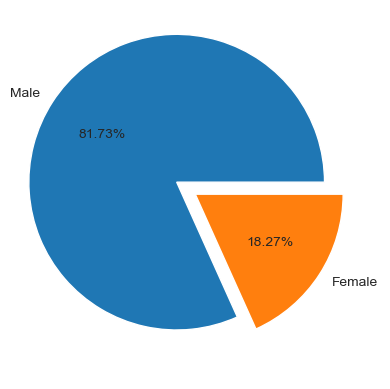

In [78]:
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));


In [79]:
df['Married'].value_counts()

Yes    401
No     212
Name: Married, dtype: int64

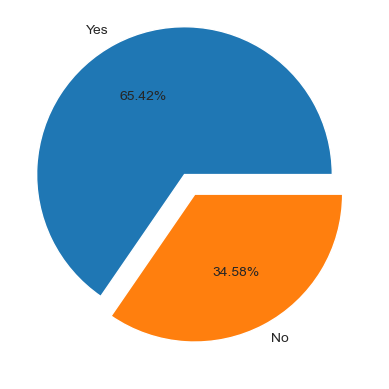

In [80]:
plt.pie(df['Married'].value_counts().values,labels=df['Married'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));


In [81]:
df.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              133
         N               79
Yes      Y              288
         N              113
Name: Loan_Status, dtype: int64

Analyzing the distribution of loan status based on marital status, we make the following important observation:

Among applicants who are not married, 134 loans have been approved ('Y') and 79 loans have been rejected ('N'). On the other hand, among married applicants, 288 loans have been approved and 113 loans have been rejected. This observation suggests that a higher proportion of married individuals have been approved for loans compared to those who are not married.

This marital status-based analysis provides insight into the potential influence of marital status on loan approval rates within the dataset. Further investigation could explore the underlying factors contributing to this difference in loan approval between married and unmarried individuals.

<Axes: xlabel='Dependents', ylabel='count'>

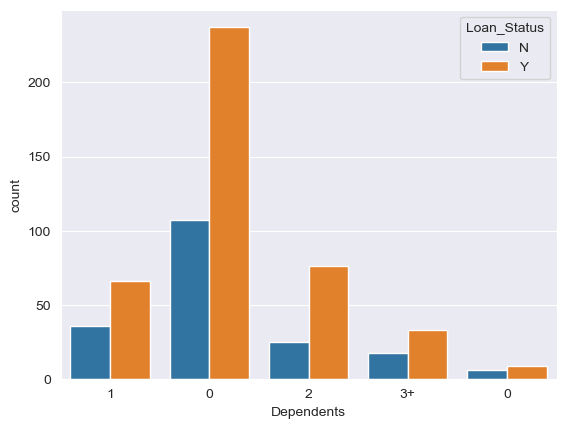

In [83]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

Analyzing the distribution of loan status based on the number of dependents, we make the following important observation:

Applicants with 0 dependents: Among applicants with no dependents, 247 loans have been approved ('Y'), while 113 loans have been rejected ('N'). This indicates a higher approval rate for applicants with no dependents.

Applicants with 1 dependent: Among applicants with one dependent, 66 loans have been approved, and 36 loans have been rejected.

Applicants with 2 dependents: Among applicants with two dependents, 76 loans have been approved, and 25 loans have been rejected.

Applicants with 3+ dependents: Among applicants with three dependents, 33 loans have been approved, and 18 loans have been rejected.

<Axes: xlabel='Education', ylabel='count'>

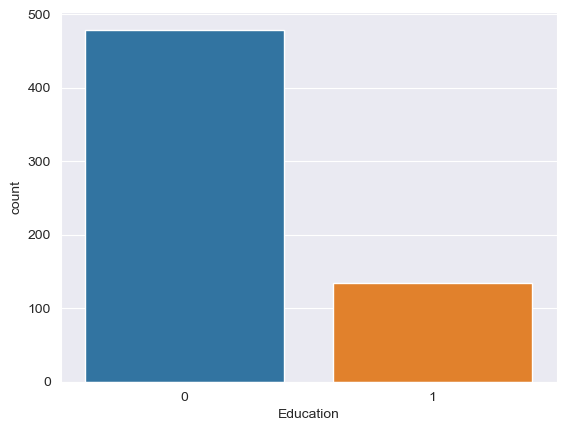

In [100]:
sns.countplot(x='Education', data=df)

<Axes: xlabel='Education', ylabel='count'>

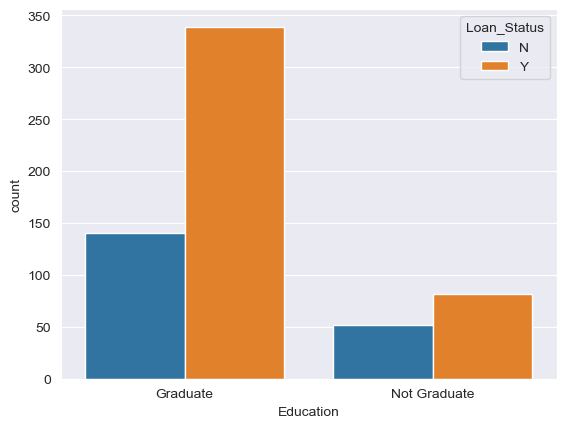

In [85]:
sns.countplot(x= 'Education',hue='Loan_Status',data=df)

In [86]:
df.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              339
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

Education and Loan Status Observation
Examining the distribution of loan status based on education level, we make the following important observation:

Graduate Applicants: Among graduate applicants, 340 loans have been approved ('Y'), while 140 loans have been rejected ('N'). This indicates a higher approval rate for graduate applicants.

Non-Graduate Applicants: Among non-graduate applicants, 82 loans have been approved, and 52 loans have been rejected.

In [88]:
df['Credit_History'].value_counts()

1    524
0     89
Name: Credit_History, dtype: int64

<Axes: xlabel='Credit_History', ylabel='count'>

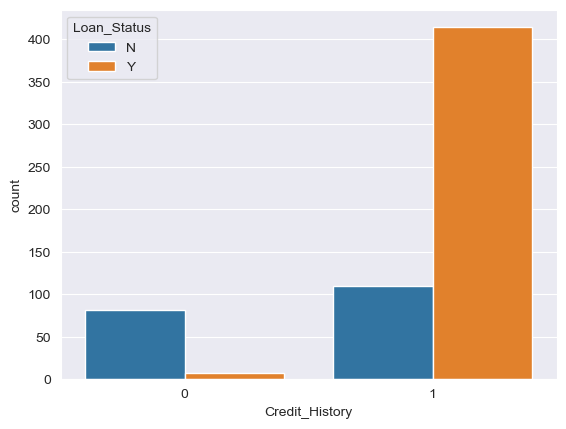

In [89]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

In [90]:
df.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0               N               82
                Y                7
1               Y              414
                N              110
Name: Loan_Status, dtype: int64

Analyzing the distribution of loan status based on credit history, we make the following important observation:

Applicants with No Credit History (Credit_History = 0): Among applicants with no credit history, only 7 loans have been approved ('Y'), while 82 loans have been rejected ('N'). This indicates a significantly lower approval rate for applicants with no credit history.

Applicants with Good Credit History (Credit_History = 1): Among applicants with good credit history, 415 loans have been approved, and 110 loans have been rejected.

<Axes: xlabel='Property_Area', ylabel='count'>

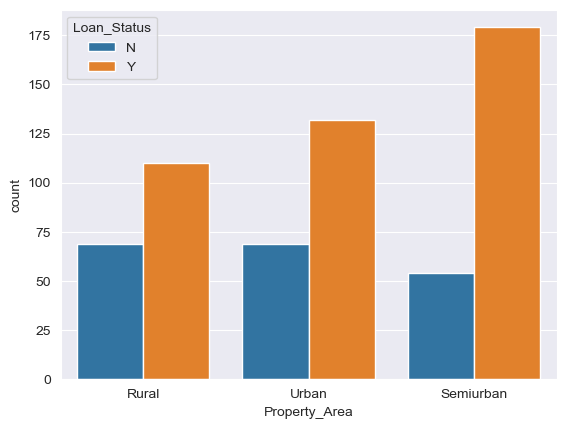

In [91]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

In [92]:
df.groupby('Property_Area')['Loan_Status'].value_counts()


Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              132
               N               69
Name: Loan_Status, dtype: int64

Analyzing the distribution of loan status based on property area, we make the following important observation:

Rural Property Area: Among applicants from rural property areas, 110 loans have been approved ('Y'), while 69 loans have been rejected ('N'). This indicates a higher approval rate for loan applicants residing in rural areas.

Semiurban Property Area: Among applicants from semiurban property areas, 179 loans have been approved, and 54 loans have been rejected.

Urban Property Area: Among applicants from urban property areas, 133 loans have been approved, and 69 loans have been rejected.

In [96]:
from sklearn.preprocessing import LabelEncoder

categorical_col = ['Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508,128,360,1,0,0
1,1,1,0,0,1,3000,0,66,360,1,2,1
2,1,1,0,1,0,2583,2358,120,360,1,2,1
3,1,0,0,0,0,6000,0,141,360,1,2,1
4,1,1,2,0,1,5417,4196,267,360,1,2,1


In [104]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

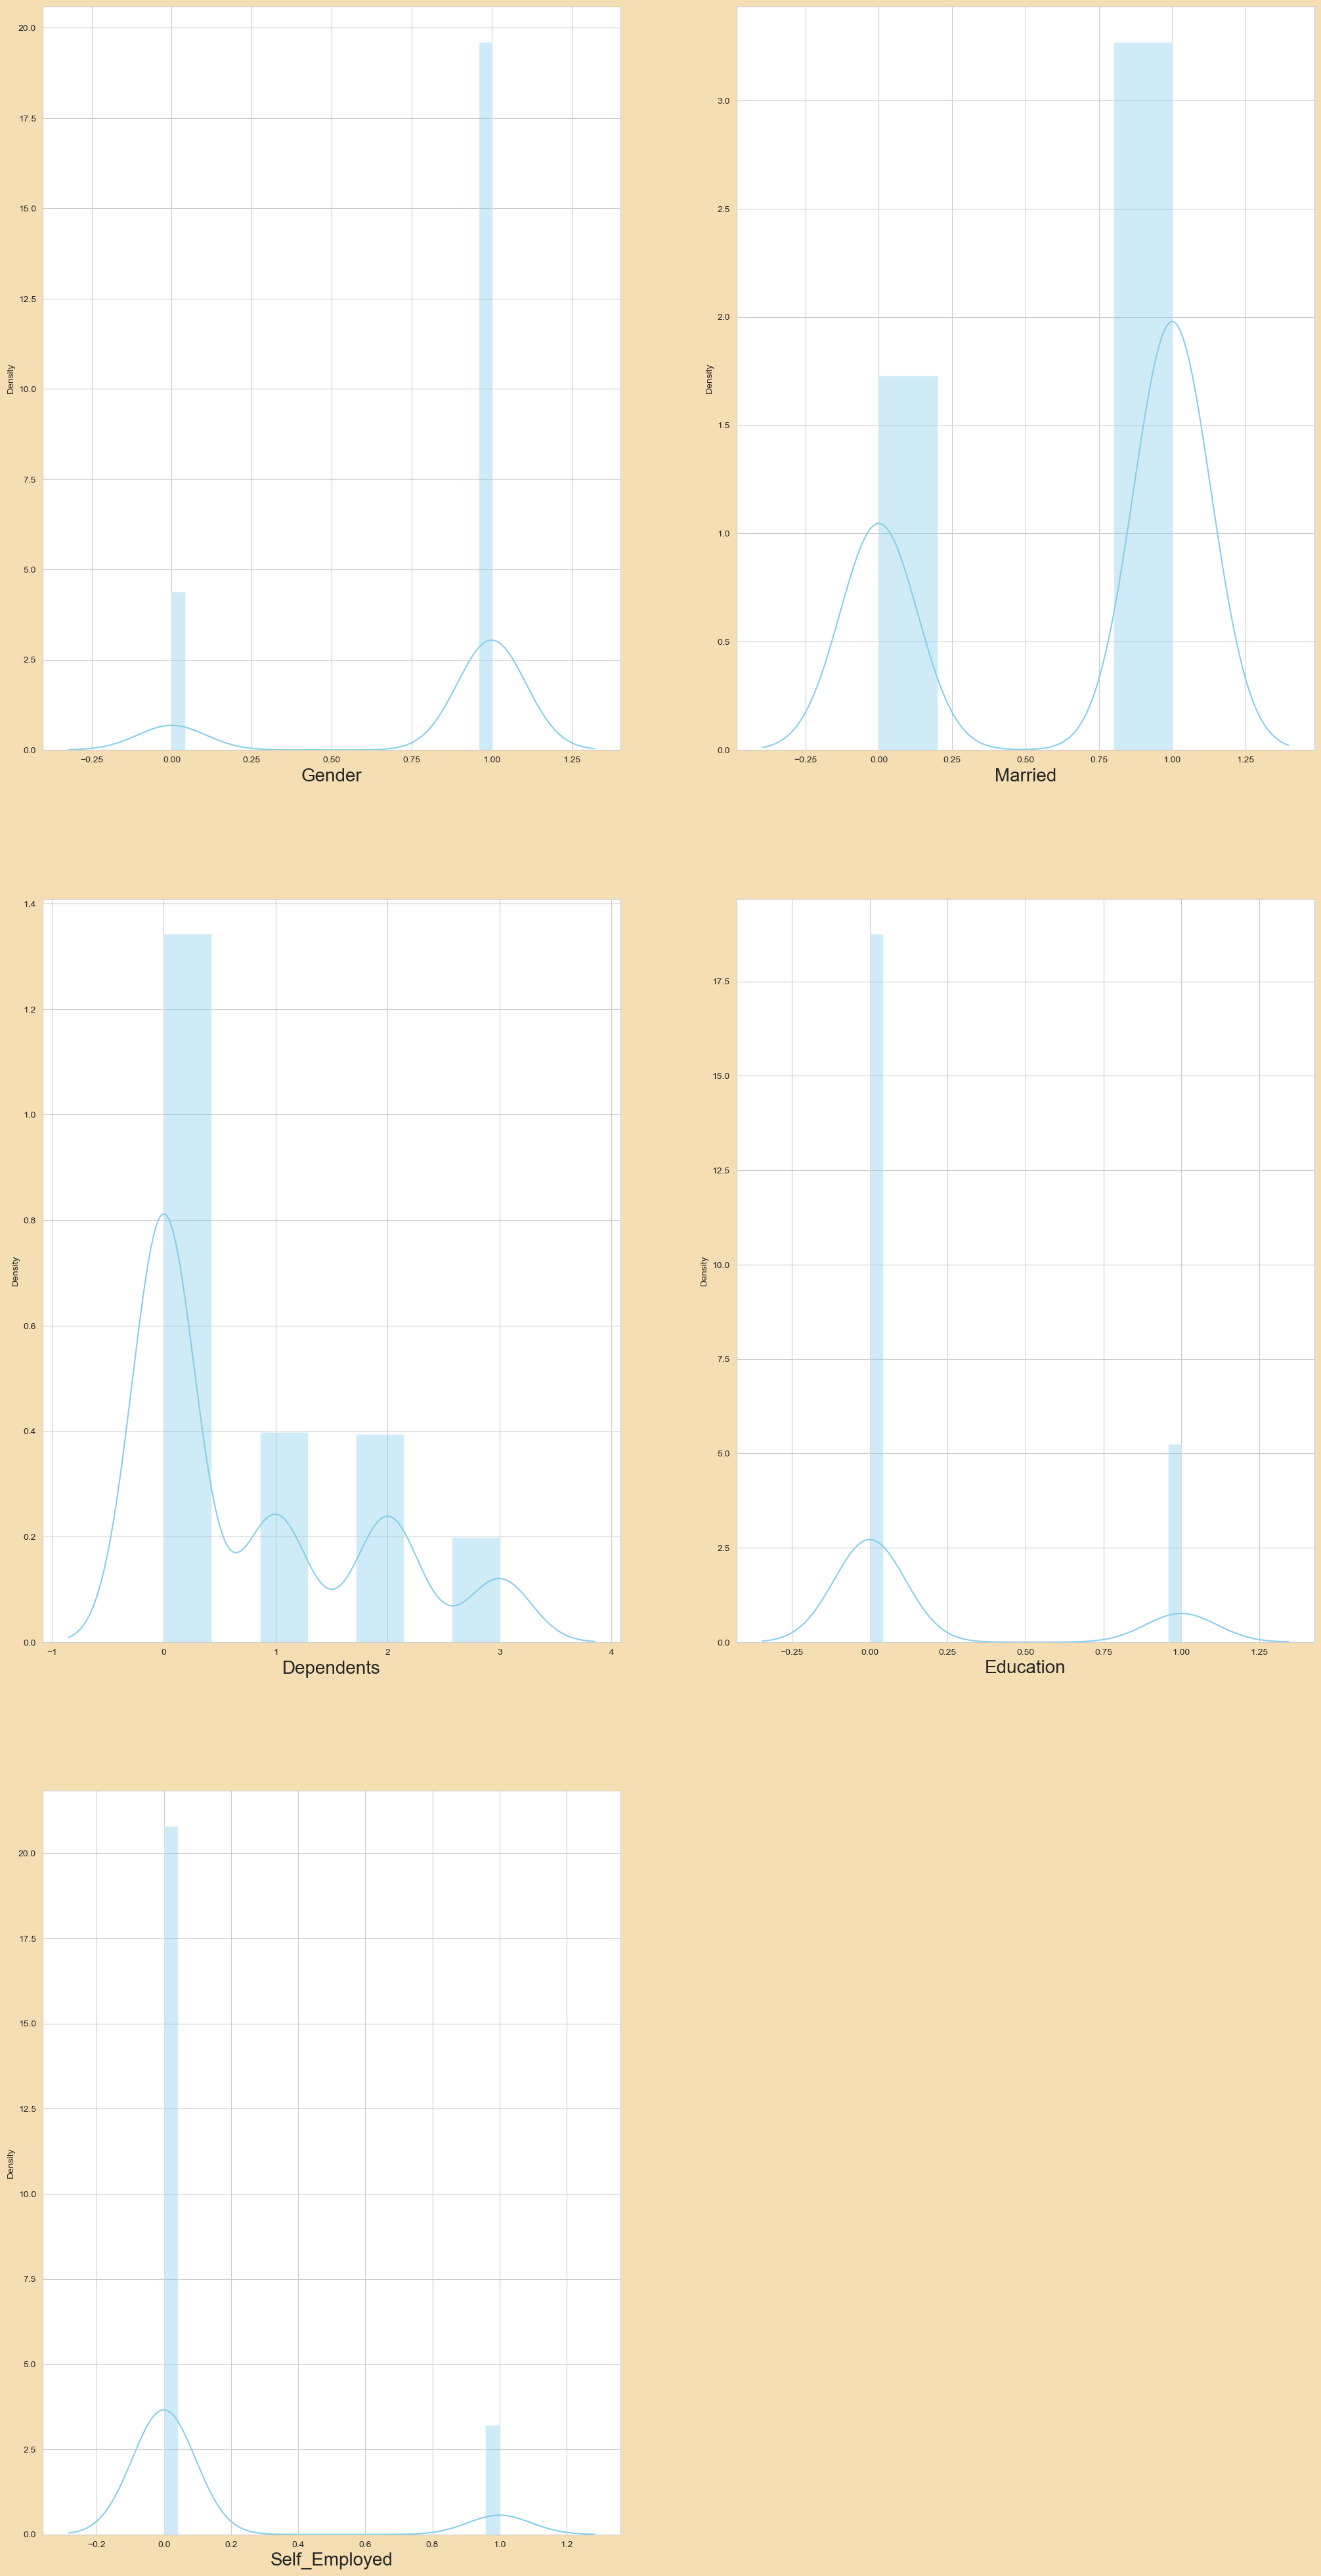

In [105]:
#numerical_columns = df.select_dtypes(include='number').columns
sns.set_style('whitegrid')
plt.figure(figsize = (25,50), facecolor = 'wheat')
plotnumber = 1

for column in df:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

## Removing Skewness of Dataset.


In [108]:
df.skew()


Gender              -1.646215
Married             -0.649810
Dependents           0.976154
Education            1.365098
Self_Employed        2.157034
ApplicantIncome      6.534654
CoapplicantIncome    7.488651
LoanAmount           2.724893
Loan_Amount_Term    -2.399297
Credit_History      -2.019265
Property_Area       -0.063379
Loan_Status         -0.807437
dtype: float64

In [109]:
skew = ['Gender','Education','Dependents','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

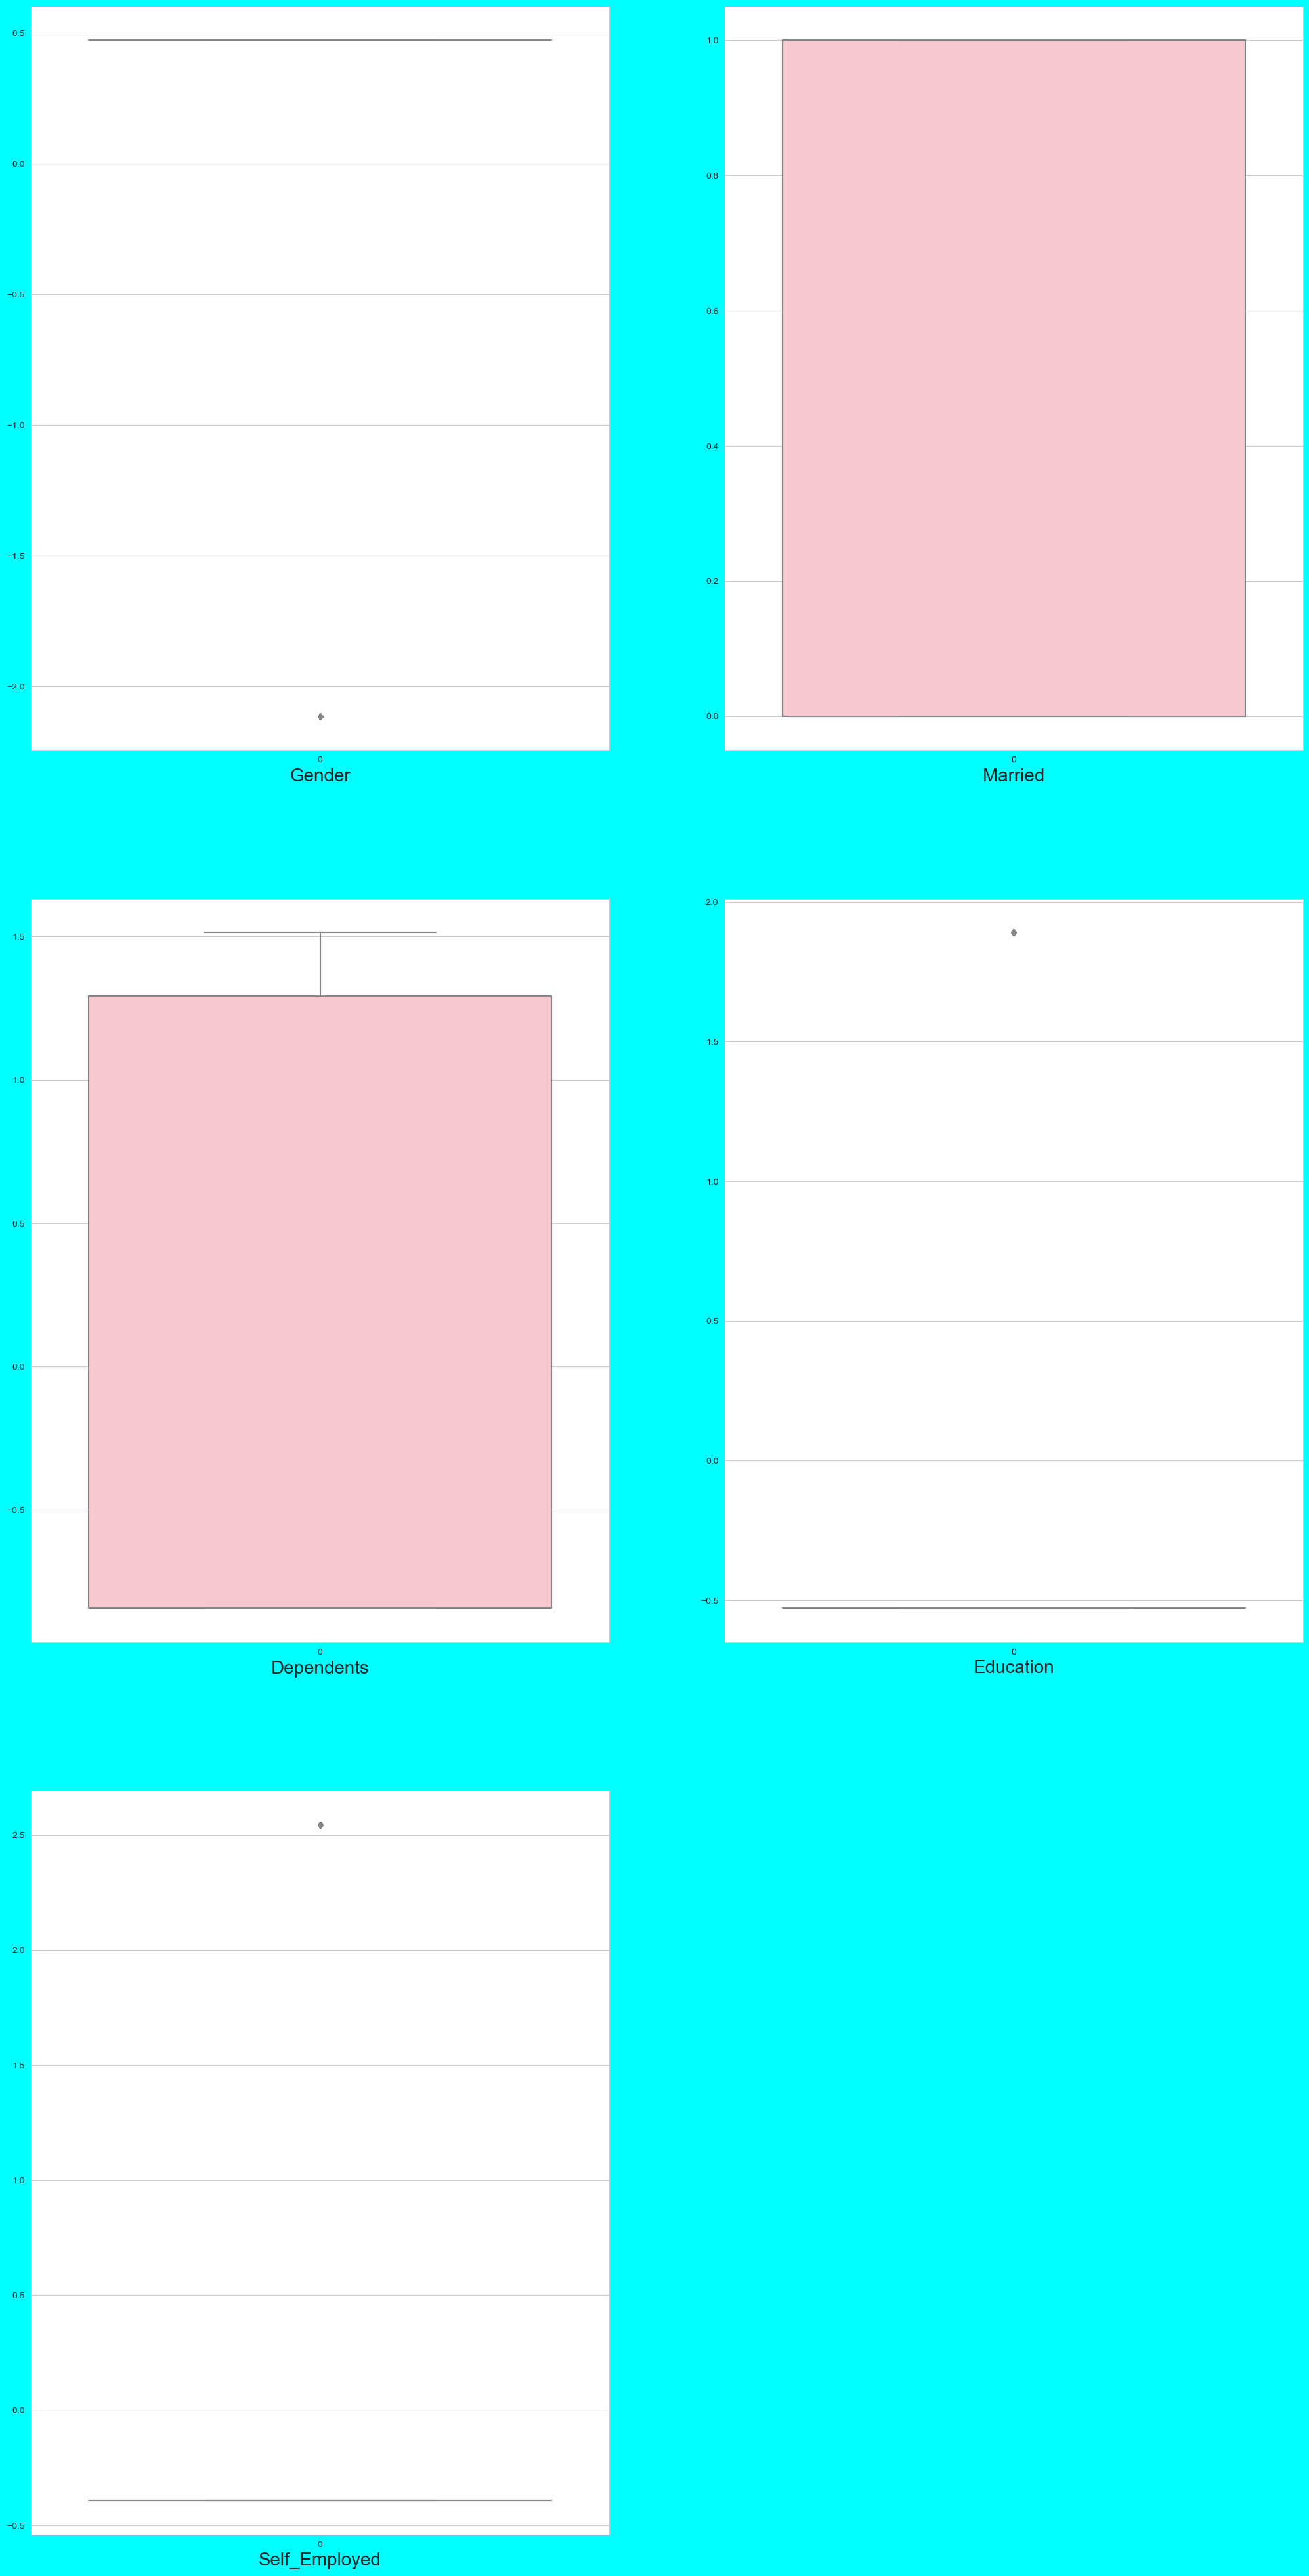

In [110]:
plt.figure(figsize = (25,50), facecolor = 'cyan')
plotnumber = 1

for column in df:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column], color = 'pink')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

## Removing Outliers

In [116]:
from scipy.stats import zscore

columns_to_remove_outliers = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

z_scores = df[columns_to_remove_outliers].apply(zscore)

threshold = 3

df = df[(z_scores.abs() < threshold).all(axis=1)]

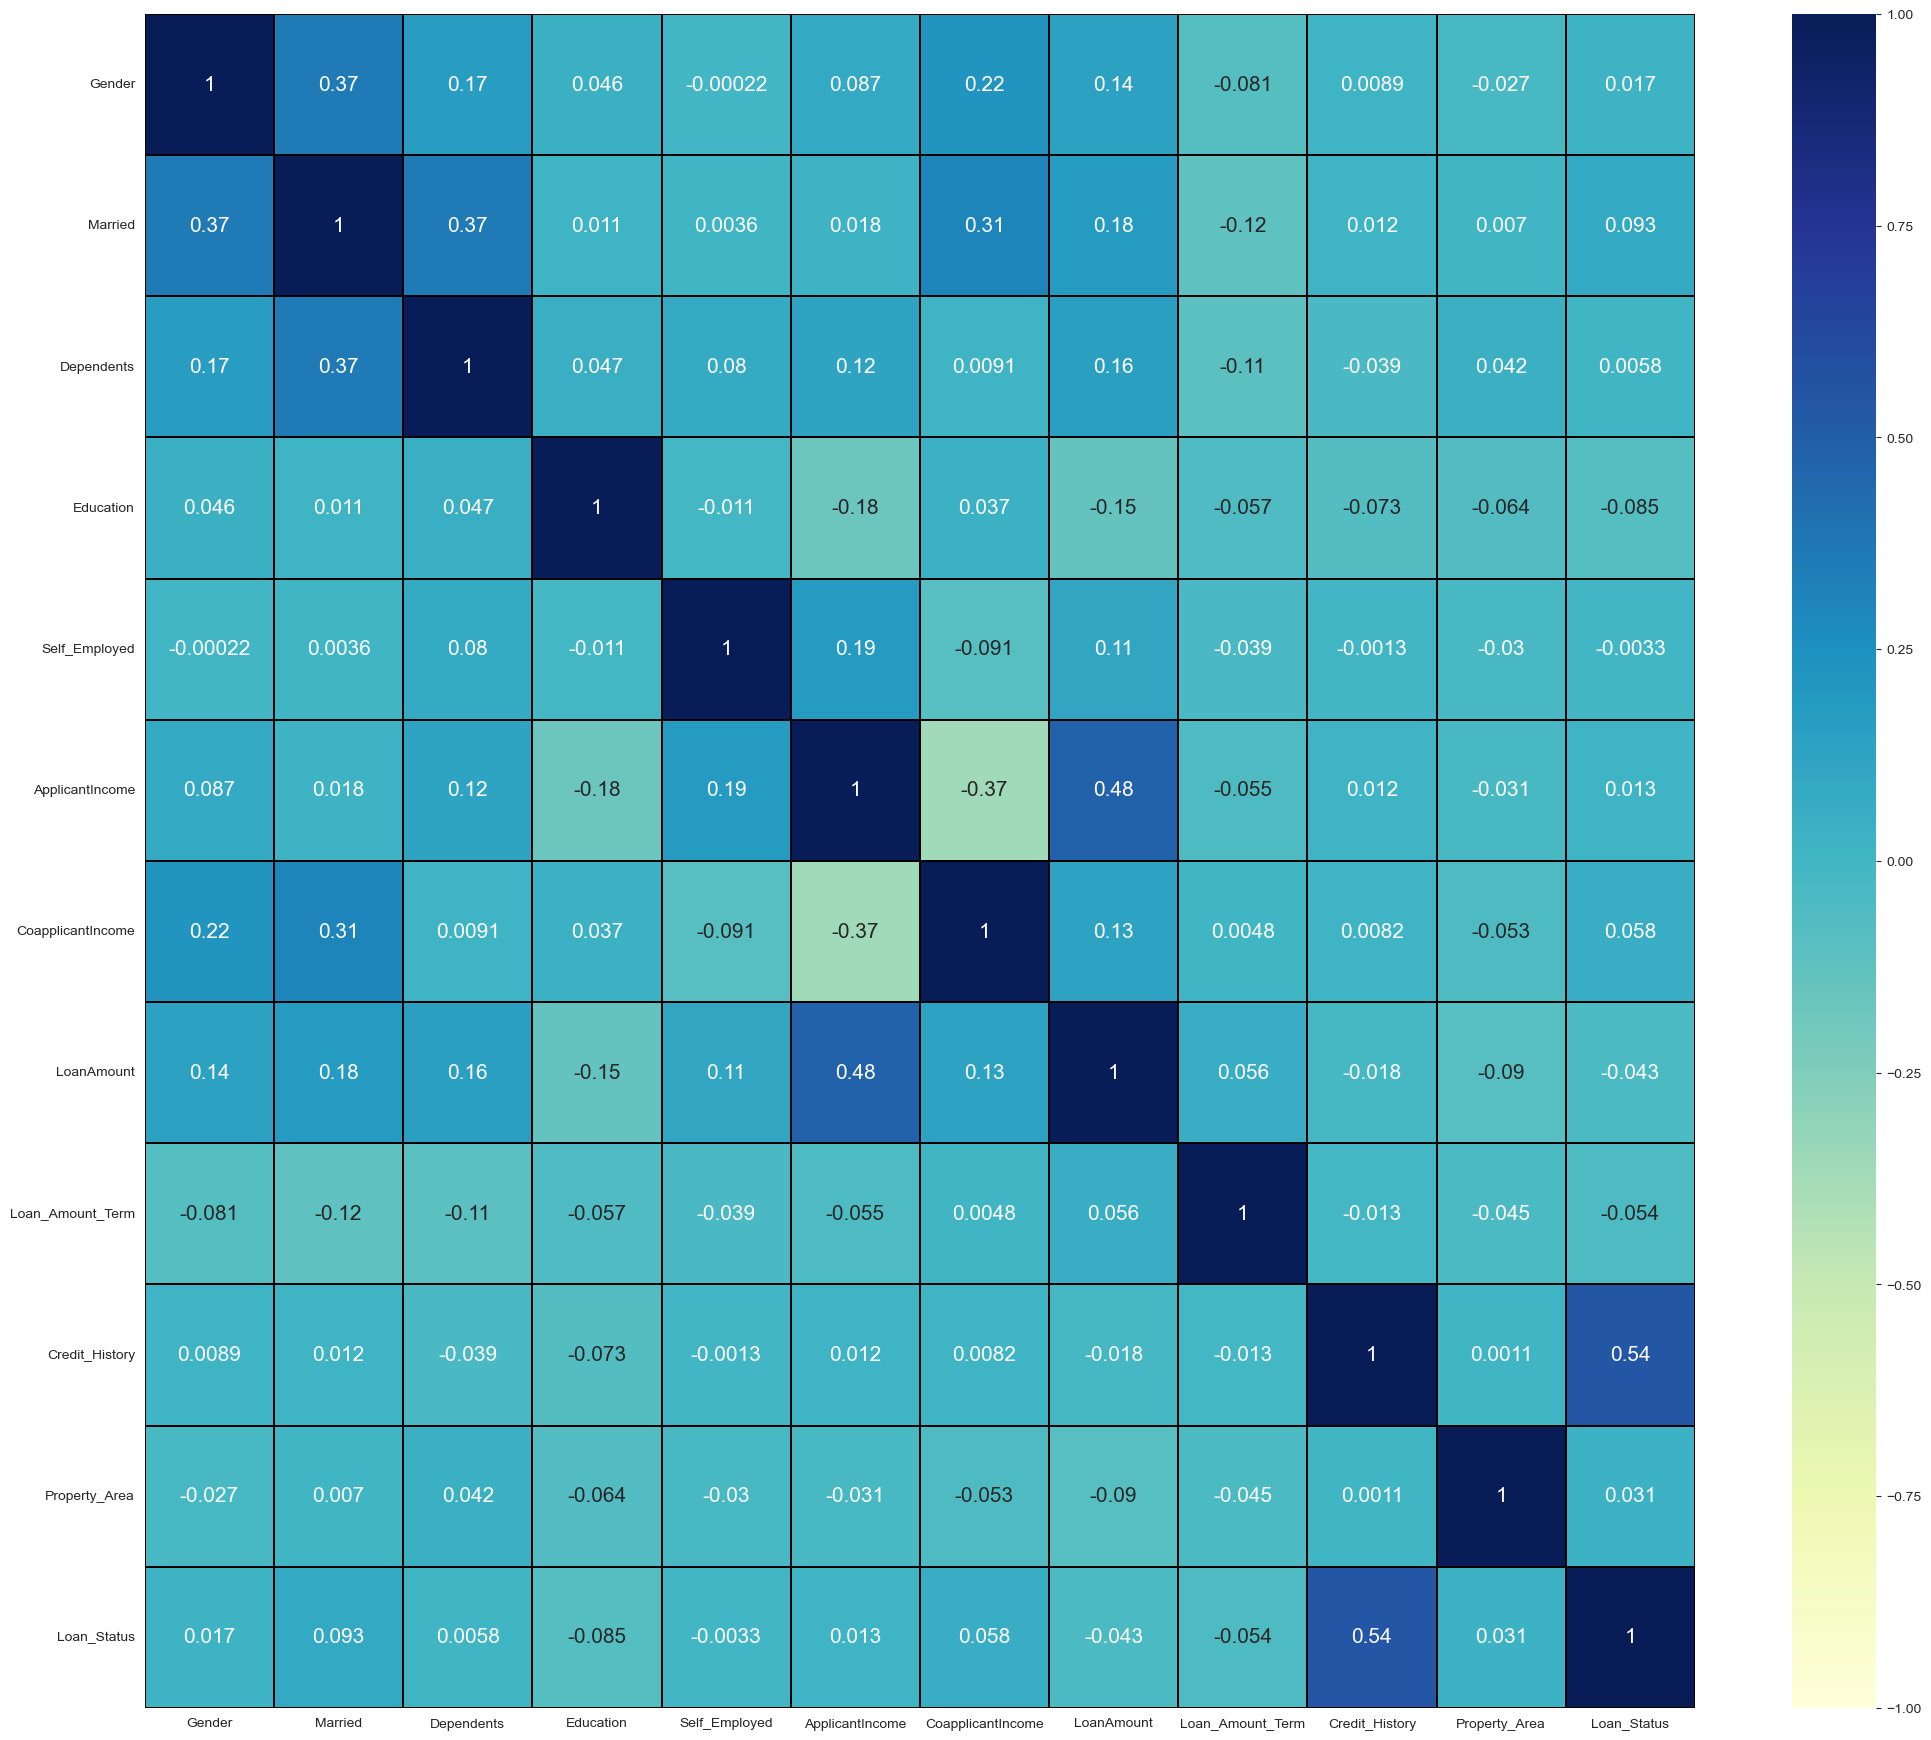

In [112]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

### Checking Correlation with target column

In [113]:
#correlation with target column
correlation_with_quality = df.corr()['Loan_Status'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Loan_Status          1.000000
Credit_History       0.540378
Married              0.093165
Education            0.085354
CoapplicantIncome    0.058078
Loan_Amount_Term     0.053768
LoanAmount           0.042681
Property_Area        0.030815
Gender               0.017477
ApplicantIncome      0.012989
Dependents           0.005756
Self_Employed        0.003270
Name: Loan_Status, dtype: float64


We can observe that "ApplicantIncome" and "Self_Employed" are relatively weakly correlated with the label, indicating that they may have limited contribution to the prediction. But i am not deleting "ApplicantIncome"

In [114]:
# dropping irrelevant columns
df.drop('Self_Employed',axis=1,inplace=True)

In [115]:
#Checking Correlation between columns to columns
df_corr = df.corr()
df_corr

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.366255,0.167014,0.045790,0.086857,0.220673,0.142795,-0.080561,0.008855,-0.026732,0.017477
Married,0.366255,1.000000,0.365006,0.011141,0.018198,0.310809,0.180445,-0.122974,0.011880,0.007014,0.093165
Dependents,0.167014,0.365006,1.000000,0.047251,0.118454,0.009107,0.155835,-0.110357,-0.039013,0.042001,0.005756
Education,0.045790,0.011141,0.047251,1.000000,-0.177800,0.037400,-0.147410,-0.057388,-0.073330,-0.064282,-0.085354
ApplicantIncome,0.086857,0.018198,0.118454,-0.177800,1.000000,-0.366719,0.484174,-0.054585,0.012301,-0.030514,0.012989
CoapplicantIncome,0.220673,0.310809,0.009107,0.037400,-0.366719,1.000000,0.134952,0.004833,0.008219,-0.053338,0.058078
LoanAmount,0.142795,0.180445,0.155835,-0.147410,0.484174,0.134952,1.000000,0.056255,-0.017791,-0.090411,-0.042681
Loan_Amount_Term,-0.080561,-0.122974,-0.110357,-0.057388,-0.054585,0.004833,0.056255,1.000000,-0.013295,-0.044601,-0.053768
Credit_History,0.008855,0.011880,-0.039013,-0.073330,0.012301,0.008219,-0.017791,-0.013295,1.000000,0.001143,0.540378
Property_Area,-0.026732,0.007014,0.042001,-0.064282,-0.030514,-0.053338,-0.090411,-0.044601,0.001143,1.000000,0.030815


## Splitting Dataset

In [117]:
X = df.drop(columns = ["Loan_Status"])
y = df["Loan_Status"]

In [120]:
X['Dependents'].fillna(value=X['Dependents'].mode()[0], inplace= True)


In [121]:
X.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Varience-inflation-factor

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Gender,1.198384
1,Married,3.231728
2,Dependents,1.177701
3,Education,1.066495
4,ApplicantIncome,1.972817
5,CoapplicantIncome,1.612434
6,LoanAmount,1.732710
7,Loan_Amount_Term,1.068559
8,Credit_History,3.348792
9,Property_Area,2.398542


### Data Balancing

In [126]:
sm=SMOTE() 
x,y=sm.fit_resample(X,y)
x.shape , y.shape


((806, 10), (806,))

## Machine Learning Model


In [127]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8271604938271605 on Random State = 82


In [129]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

In [130]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

In [131]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 82.71604938271605
Confusion Matrix of  LogisticRegression()  is 
 [[60 26]
 [ 2 74]]
              precision    recall  f1-score   support

           0       0.97      0.70      0.81        86
           1       0.74      0.97      0.84        76

    accuracy                           0.83       162
   macro avg       0.85      0.84      0.83       162
weighted avg       0.86      0.83      0.82       162

******************************
Accuracy_Score of  RidgeClassifier() is 79.62962962962963
Confusion Matrix of  RidgeClassifier()  is 
 [[55 31]
 [ 2 74]]
              precision    recall  f1-score   support

           0       0.96      0.64      0.77        86
           1       0.70      0.97      0.82        76

    accuracy                           0.80       162
   macro avg       0.83      0.81      0.79       162
weighted avg       0.84      0.80      0.79       162

******************************
Accuracy_Score of  DecisionTreeCla

In [132]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 82.71604938271605
cross Validation accuracy score of  LogisticRegression()  is  75.81627175830074
**************************************************
Accuracy_Score of  RidgeClassifier() is 79.62962962962963
cross Validation accuracy score of  RidgeClassifier()  is  75.5678245533318
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 80.8641975308642
cross Validation accuracy score of  DecisionTreeClassifier()  is  76.68046928916495
**************************************************
Accuracy_Score of  SVC() is 80.8641975308642
cross Validation accuracy score of  SVC()  is  76.68200291388698
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 76.5432098765432
cross Validation accuracy score of  KNeighborsClassifier()  is  77.55080131891727
**************************************************
Accuracy_Score of  RandomForestClassifier() is 85.18518518518519
cro

RandomForestClassifier gave best accuracy score and minimum difference for generalise model

## Hyperparameter tuning on RandomForestClassifier


In [133]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [134]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [135]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=282, max_features='auto', n_estimators=200)

In [136]:
grid_search.best_params_

{'max_depth': 282,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [137]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8518518518518519

In [144]:
prediction=pd.DataFrame({'predicted values':y_pred,'actual values':y_test})
prediction

,predicted values,actual values
270,1,0
153,1,0
339,1,1
321,1,0
75,0,0
...,...,...
666,0,0
316,1,1
87,1,1
477,1,1


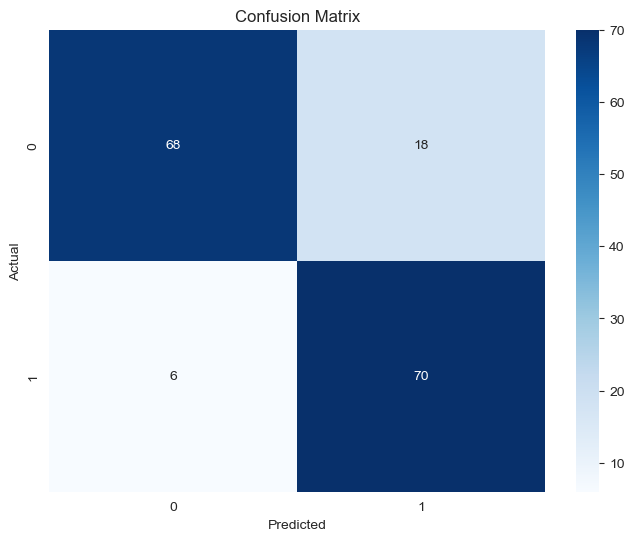

In [142]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Saving the model

In [145]:
import joblib
joblib.dump(model,'Loan_Application_Status.pkl')

['Loan_Application_Status.pkl']